# Autoencoders

In [1]:
#import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("numerai_training_data_.csv")

In [3]:
train_data = train_data.drop(['target'], 1)

In [17]:
col_max = train_data.apply(max, axis=0)
col_min = train_data.apply(min, axis=0)

In [20]:
print zip(col_min,col_max)

[(1.0, 0.011190854236643399), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0026839202889124103), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.00091455346283621502), (0.99043905701634405, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.99331076814826103, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0)]


* All the features are in the range [0,1], decided not to normalize the features

In [23]:
corr = train_data.corr()

In [24]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

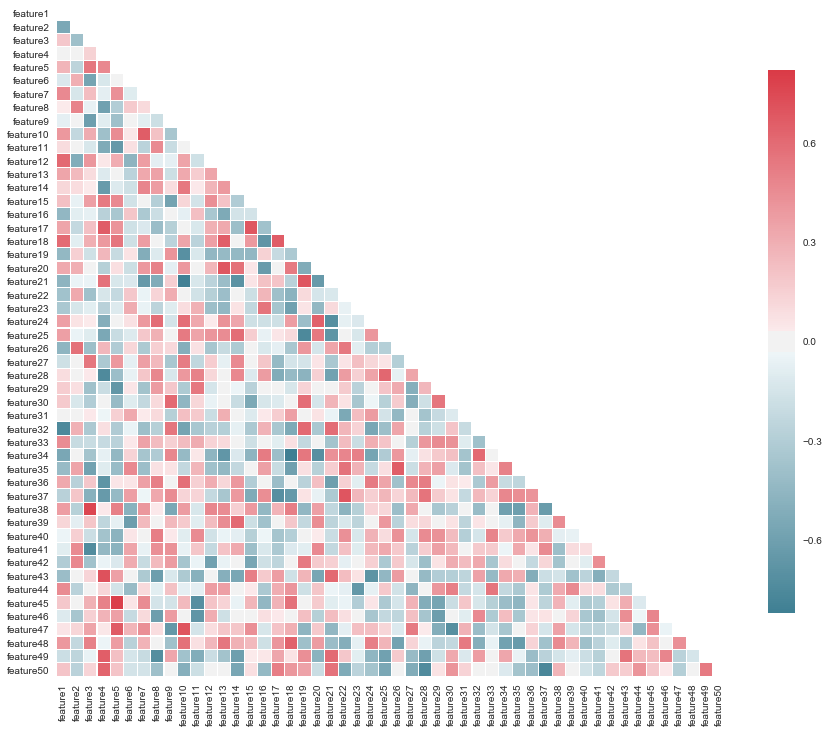

In [25]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(style="white")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=0.1, 
            cbar_kws={"shrink": .5}, ax=ax)

# Creating feed forward neural network

In [ ]:
# Parameters
learning_rate = 0.01
training_epochs = 260
batch_size = 128
display_step = 10

In [ ]:
# Network Parameters
n_hidden_1 = 35 # 1st layer num features
n_hidden_2 = 15 # 2nd layer num features
n_hidden_3 = 5  # 3rd layer num features
n_input = 50    # input num features

In [ ]:
# tf Graph input
X = tf.placeholder("float64", [None, n_input], name="X")

In [ ]:
weights = {
'encoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_input,n_hidden_1)), name="w_e_h1"),
'encoder_h2': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_1, n_hidden_2)), name="w_e_h2"),
'encoder_h3': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_2, n_hidden_3)), name="w_e_h3"),
'decoder_h1': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_3, n_hidden_2)), name="w_d_h1"),
'decoder_h2': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_2, n_hidden_1)), name="w_d_h2"),
'decoder_h3': tf.Variable(np.random.normal(scale=0.1,size=(n_hidden_1, n_input)),    name="w_d_h3")
}
biases = {
'encoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_e_h1"), 'float64'),
'encoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_e_h2"), 'float64'),
'encoder_b3': tf.cast(tf.Variable(tf.ones([n_hidden_3]),  name="b_e_h3"), 'float64'),
'decoder_b1': tf.cast(tf.Variable(tf.ones([n_hidden_2]),  name="b_d_h1"), 'float64'),
'decoder_b2': tf.cast(tf.Variable(tf.ones([n_hidden_1]),  name="b_d_h2"), 'float64'),
'decoder_b3': tf.cast(tf.Variable(tf.ones([n_input]),     name="b_e_h3"), 'float64')
}

In [ ]:
biases['encoder_b1'].dtype

In [ ]:
#Add histogram summaries for weights

tf.summary.histogram("w_e_h1_summ", weights['encoder_h1'])
tf.summary.histogram("w_e_h2_summ", weights['encoder_h2'])
tf.summary.histogram("w_e_h3_summ", weights['encoder_h3'])
tf.summary.histogram("w_d_h1_summ", weights['decoder_h1'])
tf.summary.histogram("w_d_h2_summ", weights['decoder_h2'])
tf.summary.histogram("w_d_h3_summ", weights['decoder_h3'])

In [ ]:
# Building the encoder
def encoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("en_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                                    biases['encoder_b1']))
# Encoder Hidden layer with sigmoid activation #2
    with tf.name_scope("en_layer2"):
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                                          biases['encoder_b2']))
# Encoder Hidden layer with sigmoid activation #3
    with tf.name_scope("en_layer3"):
        layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                                          biases['encoder_b3']))
    return layer_3

In [ ]:
# Building the decoder
def decoder(x):
# Encoder Hidden layer with sigmoid activation #1
    with tf.name_scope("de_layer1"):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                                    biases['decoder_b1']))
# Decoder Hidden layer with sigmoid activation #2
    with tf.name_scope("de_layer2"):
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                                          biases['decoder_b2']))
# Decoder Hidden layer with sigmoid activation #2
    with tf.name_scope("de_layer3"):
        layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                                          biases['decoder_b3']))
    return layer_3


In [ ]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [ ]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [ ]:
# Define loss and optimizer, minimize the squared error
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
    train_op = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
    # Add scalar summary for cost tensor
    tf.summary.scalar("cost", cost)

In [ ]:
# Initializing the variables
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("./logs/autoencoder_logs", sess.graph)
    merged = tf.summary.merge_all()
    
    sess.run(init)
    total_batch = int(len(train_data)/batch_size)
    
    # Training cycle
    for epoch in xrange(training_epochs):
    # Loop over all batches
        for start, end in zip(range(0, len(train_data), batch_size), range(batch_size, len(train_data)+1, batch_size)):
            batch_xs = train_data[start:end]
            
            _, c, summary = sess.run([train_op, cost, merged], feed_dict={X: batch_xs})
        
        writer.add_summary(summary, epoch)
        
        # Display logs per epoch step
        if epoch % display_step == 0 or epoch+1 == training_epochs:
            print("Epoch:", '%04d' % (epoch+1), 
                  "cost=", "{:.9f}".format(c))
            
    recon_ip, reduced_ip = sess.run([decoder_op, encoder_op], feed_dict={X: train_data})

In [ ]:
len(recon_ip)

In [ ]:
len(train_data.values)

In [ ]:
recon_ip_df = pd.DataFrame(recon_ip)
reduced_ip_df = pd.DataFrame(reduced_ip)

In [ ]:
recon_ip_df

In [ ]:
pd.DataFrame(train_data[0:4])

In [ ]:
pd.DataFrame(reduced_ip)

# PCA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [26]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [43]:
svd_solvers = ['auto', 'full', 'arpack', 'randomized']
for svd_solver in svd_solvers: 
    pca = PCA(n_components=5)
    pca_encomp = pca.fit_transform(train_data)
    pca_decomp = pca.inverse_transform(pca_encomp)
    pca_recon_loss = mean_squared_error(train_data, pca_decomp)
    print "PCA Reconstruction loss(",svd_solver,") : ", "{:.9f}".format(pca_recon_loss)

PCA Reconstruction loss( auto ) :  0.004783325
PCA Reconstruction loss( full ) :  0.004783325
PCA Reconstruction loss( arpack ) :  0.004783325
PCA Reconstruction loss( randomized ) :  0.004783325


* Setting whiten=True also yielded the same result. Differnet Hyper-parameters yeilded the same result

# KernelPCA
** Discarding KPCA as it runs out of memory

In [57]:
from sklearn.decomposition import KernelPCA

In [59]:
kpca = KernelPCA(n_components=5,kernel="rbf", gamma=10, n_jobs=-1)
kpca_encomp = kpca.fit_transform(train_data)
kpca_decomp = kpca.inverse_transform(kpca_encomp)
kpca_recon_loss = mean_squared_error(train_data, kpca_decomp)
print "KPCA Reconstruction loss: ", kpca_recon_loss

JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = r'C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\runpy.py in _run_code(code=<code object <module> at 00000000026E9630, file ...lib\site-packages\ipykernel\__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': r'C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from 'C:\Users\439...onda2\lib\site-packages\ipykernel\kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname=r'C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 00000000026E9630, file ...lib\site-packages\ipykernel\__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': r'C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from 'C:\Users\439...onda2\lib\site-packages\ipykernel\kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'kpca = KernelPCA(n_components=5,kernel="rbf", ...nt "KPCA Reconstruction loss: ", kpca_recon_loss', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2017-02-06T18:15:42.214000', u'msg_id': u'2B2F892B490F4C6C8BEA13C5D8660C45', u'msg_type': u'execute_request', u'session': u'6911530D68084E1D875D2EC2BB0C2F7C', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'2B2F892B490F4C6C8BEA13C5D8660C45', 'msg_type': u'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['6911530D68084E1D875D2EC2BB0C2F7C']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'kpca = KernelPCA(n_components=5,kernel="rbf", ...nt "KPCA Reconstruction loss: ", kpca_recon_loss', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2017-02-06T18:15:42.214000', u'msg_id': u'2B2F892B490F4C6C8BEA13C5D8660C45', u'msg_type': u'execute_request', u'session': u'6911530D68084E1D875D2EC2BB0C2F7C', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'2B2F892B490F4C6C8BEA13C5D8660C45', 'msg_type': u'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['6911530D68084E1D875D2EC2BB0C2F7C'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'kpca = KernelPCA(n_components=5,kernel="rbf", ...nt "KPCA Reconstruction loss: ", kpca_recon_loss', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2017-02-06T18:15:42.214000', u'msg_id': u'2B2F892B490F4C6C8BEA13C5D8660C45', u'msg_type': u'execute_request', u'session': u'6911530D68084E1D875D2EC2BB0C2F7C', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'2B2F892B490F4C6C8BEA13C5D8660C45', 'msg_type': u'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'kpca = KernelPCA(n_components=5,kernel="rbf", ...nt "KPCA Reconstruction loss: ", kpca_recon_loss', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'kpca = KernelPCA(n_components=5,kernel="rbf", ...nt "KPCA Reconstruction loss: ", kpca_recon_loss'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'kpca = KernelPCA(n_components=5,kernel="rbf", ...nt "KPCA Reconstruction loss: ", kpca_recon_loss',), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'kpca = KernelPCA(n_components=5,kernel="rbf", ...nt "KPCA Reconstruction loss: ", kpca_recon_loss',)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'kpca = KernelPCA(n_components=5,kernel="rbf", ...nt "KPCA Reconstruction loss: ", kpca_recon_loss', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Print object>], cell_name='<ipython-input-59-20f6f31906a0>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 11405400, execution_c..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 00000000113FBAB0, file "<ipython-input-59-20f6f31906a0>", line 2>
        result = <ExecutionResult object at 11405400, execution_c..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 00000000113FBAB0, file "<ipython-input-59-20f6f31906a0>", line 2>, result=<ExecutionResult object at 11405400, execution_c..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 00000000113FBAB0, file "<ipython-input-59-20f6f31906a0>", line 2>
        self.user_global_ns = {'In': ['', u"#import tensorflow as tf\nimport pandas as pd\...s plt\nget_ipython().magic(u'matplotlib inline')", u'train_data = pd.read_csv("numerai_training_data_.csv")', u"train_data = train_data.drop(['target'], 1)", u'print max(train_data.max(axis=1))\nprint min(train_data.min(axis=1))', u"from sklearn.preprocessing import normalize\nt..._norm = normalize(train_data, norm='l1', axis=1)", u'sum(train_data_norm[:,49:50])', u'pd.DataFrame(train_data_norm)', u'corr = train_data.corr()', u'# Generate a mask for the upper triangle\nmask...p.bool)\nmask[np.triu_indices_from(mask)] = True', u'# Set up the matplotlib figure\nf, ax = plt.su...1, \n            cbar_kws={"shrink": .5}, ax=ax)', u'print max(train_data[0:50].max(axis=1))\nprint min(train_data.min(axis=1))', u'print max(train_data.max(axis=1))\nprint min(train_data.min(axis=1))', u'col_max = train_data.apply(max, axis=1)\ncol_min = train_data.apply(min, axis=1)', u'print zip(col_max,col_min)', u'print len(zip(col_max,col_min))', u'print len(col_max)', u'col_max = train_data.apply(max, axis=0)\ncol_min = train_data.apply(min, axis=0)', u'print len(col_max)', u'print zip(col_max,col_min))', ...], 'KernelPCA': <class 'sklearn.decomposition.kernel_pca.KernelPCA'>, 'Out': {6: array([ 2963.82072961]), 7:               0         1         2         3   ... 0.029311  0.028787  

[136573 rows x 50 columns], 10: <matplotlib.axes._subplots.AxesSubplot object>, 25: <matplotlib.axes._subplots.AxesSubplot object>, 30: 'kpca = KernelPCA(n_components=5,kernel="rbf", fi...int "KPCA Reconstruction loss: ", kpca_recon_loss', 37: (136573, 50), 39:             feature1  feature2      feature3    ...36572  4.120511e-03  

[136573 rows x 50 columns], 52: array([[-0.00268896, -0.0031052 ,  0.00237834, -...0260631,  0.00259661, -0.00110848,  0.00411098]]), 54: PCA(copy=True, iterated_power='auto', n_componen...None,
  svd_solver='auto', tol=0.0, whiten=False), 55: array([[ -78.38990108,  -33.71970637,  -20.74017...        ,
         105.69030683,   76.61941225]]), ...}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'SparsePCA': <class 'sklearn.decomposition.sparse_pca.SparsePCA'>, '_': (5L, 50L), '_10': <matplotlib.axes._subplots.AxesSubplot object>, '_25': <matplotlib.axes._subplots.AxesSubplot object>, '_30': 'kpca = KernelPCA(n_components=5,kernel="rbf", fi...int "KPCA Reconstruction loss: ", kpca_recon_loss', '_37': (136573, 50), ...}
        self.user_ns = {'In': ['', u"#import tensorflow as tf\nimport pandas as pd\...s plt\nget_ipython().magic(u'matplotlib inline')", u'train_data = pd.read_csv("numerai_training_data_.csv")', u"train_data = train_data.drop(['target'], 1)", u'print max(train_data.max(axis=1))\nprint min(train_data.min(axis=1))', u"from sklearn.preprocessing import normalize\nt..._norm = normalize(train_data, norm='l1', axis=1)", u'sum(train_data_norm[:,49:50])', u'pd.DataFrame(train_data_norm)', u'corr = train_data.corr()', u'# Generate a mask for the upper triangle\nmask...p.bool)\nmask[np.triu_indices_from(mask)] = True', u'# Set up the matplotlib figure\nf, ax = plt.su...1, \n            cbar_kws={"shrink": .5}, ax=ax)', u'print max(train_data[0:50].max(axis=1))\nprint min(train_data.min(axis=1))', u'print max(train_data.max(axis=1))\nprint min(train_data.min(axis=1))', u'col_max = train_data.apply(max, axis=1)\ncol_min = train_data.apply(min, axis=1)', u'print zip(col_max,col_min)', u'print len(zip(col_max,col_min))', u'print len(col_max)', u'col_max = train_data.apply(max, axis=0)\ncol_min = train_data.apply(min, axis=0)', u'print len(col_max)', u'print zip(col_max,col_min))', ...], 'KernelPCA': <class 'sklearn.decomposition.kernel_pca.KernelPCA'>, 'Out': {6: array([ 2963.82072961]), 7:               0         1         2         3   ... 0.029311  0.028787  

[136573 rows x 50 columns], 10: <matplotlib.axes._subplots.AxesSubplot object>, 25: <matplotlib.axes._subplots.AxesSubplot object>, 30: 'kpca = KernelPCA(n_components=5,kernel="rbf", fi...int "KPCA Reconstruction loss: ", kpca_recon_loss', 37: (136573, 50), 39:             feature1  feature2      feature3    ...36572  4.120511e-03  

[136573 rows x 50 columns], 52: array([[-0.00268896, -0.0031052 ,  0.00237834, -...0260631,  0.00259661, -0.00110848,  0.00411098]]), 54: PCA(copy=True, iterated_power='auto', n_componen...None,
  svd_solver='auto', tol=0.0, whiten=False), 55: array([[ -78.38990108,  -33.71970637,  -20.74017...        ,
         105.69030683,   76.61941225]]), ...}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'SparsePCA': <class 'sklearn.decomposition.sparse_pca.SparsePCA'>, '_': (5L, 50L), '_10': <matplotlib.axes._subplots.AxesSubplot object>, '_25': <matplotlib.axes._subplots.AxesSubplot object>, '_30': 'kpca = KernelPCA(n_components=5,kernel="rbf", fi...int "KPCA Reconstruction loss: ", kpca_recon_loss', '_37': (136573, 50), ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
C:\Users\43919723\Desktop\ML-repos\auto_encoders-master\<ipython-input-59-20f6f31906a0> in <module>()
      1 
----> 2 
      3 
      4 
      5 kpca = KernelPCA(n_components=5,kernel="rbf", gamma=10, n_jobs=-1)
      6 kpca_encomp = kpca.fit_transform(train_data)
      7 kpca_decomp = kpca.inverse_transform(kpca_encomp)
      8 kpca_recon_loss = mean_squared_error(train_data, kpca_decomp)
      9 print "KPCA Reconstruction loss: ", kpca_recon_loss
     10 

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\decomposition\kernel_pca.py in fit_transform(self=KernelPCA(alpha=1.0, coef0=1, copy_X=True, degre... random_state=None, remove_zero_eig=False, tol=0), X=        feature1  feature2  feature3  feature4  ...0.687968   0.675682  

[136573 rows x 50 columns], y=None, **params={})
    255 
    256         Returns
    257         -------
    258         X_new: array-like, shape (n_samples, n_components)
    259         """
--> 260         self.fit(X, **params)
        self.fit = <bound method KernelPCA.fit of KernelPCA(alpha=1...random_state=None, remove_zero_eig=False, tol=0)>
        X =         feature1  feature2  feature3  feature4  ...0.687968   0.675682  

[136573 rows x 50 columns]
        params = {}
    261 
    262         X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
    263 
    264         if self.fit_inverse_transform:

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\decomposition\kernel_pca.py in fit(self=KernelPCA(alpha=1.0, coef0=1, copy_X=True, degre... random_state=None, remove_zero_eig=False, tol=0), X=array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]]), y=None)
    231         -------
    232         self : object
    233             Returns the instance itself.
    234         """
    235         X = check_array(X, accept_sparse='csr', copy=self.copy_X)
--> 236         K = self._get_kernel(X)
        K = undefined
        self._get_kernel = <bound method KernelPCA._get_kernel of KernelPCA...random_state=None, remove_zero_eig=False, tol=0)>
        X = array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]])
    237         self._fit_transform(K)
    238 
    239         if self.fit_inverse_transform:
    240             sqrt_lambdas = np.diag(np.sqrt(self.lambdas_))

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\decomposition\kernel_pca.py in _get_kernel(self=KernelPCA(alpha=1.0, coef0=1, copy_X=True, degre... random_state=None, remove_zero_eig=False, tol=0), X=array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]]), Y=None)
    159             params = {"gamma": self.gamma,
    160                       "degree": self.degree,
    161                       "coef0": self.coef0}
    162         return pairwise_kernels(X, Y, metric=self.kernel,
    163                                 filter_params=True, n_jobs=self.n_jobs,
--> 164                                 **params)
        params = {'coef0': 1, 'degree': 3, 'gamma': 10}
    165 
    166     def _fit_transform(self, K):
    167         """ Fit's using kernel K"""
    168         # center kernel

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\pairwise.py in pairwise_kernels(X=array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]]), Y=None, metric='rbf', filter_params=True, n_jobs=-1, **kwds={'gamma': 10})
   1394     elif callable(metric):
   1395         func = partial(_pairwise_callable, metric=metric, **kwds)
   1396     else:
   1397         raise ValueError("Unknown kernel %r" % metric)
   1398 
-> 1399     return _parallel_pairwise(X, Y, func, n_jobs, **kwds)
        X = array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]])
        Y = None
        func = <function rbf_kernel>
        n_jobs = -1
        kwds = {'gamma': 10}
   1400 
   1401 
   1402 
   1403 

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\pairwise.py in _parallel_pairwise(X=array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]]), Y=array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]]), func=<function rbf_kernel>, n_jobs=4, **kwds={'gamma': 10})
   1084 
   1085     # TODO: in some cases, backend='threading' may be appropriate
   1086     fd = delayed(func)
   1087     ret = Parallel(n_jobs=n_jobs, verbose=0)(
   1088         fd(X, Y[s], **kwds)
-> 1089         for s in gen_even_slices(Y.shape[0], n_jobs))
        Y.shape = (136573L, 50L)
        n_jobs = 4
   1090 
   1091     return np.hstack(ret)
   1092 
   1093 

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object <genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Mon Feb 06 18:15:44 2017
PID: 12196Python 2.7.13: C:\Users\43919723\AppData\Local\Continuum\Anaconda2\python.exe
...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function rbf_kernel>
        args = (memmap([[ 0.45013377,  0.44063393,  0.66254561, ...  0.26367387,
         0.68796784,  0.6756819 ]]), memmap([[ 0.45013377,  0.44063393,  0.66254561, ...  0.57922217,
         0.64453602,  0.58441572]]))
        kwargs = {'gamma': 10}
        self.items = [(<function rbf_kernel>, (memmap([[ 0.45013377,  0.44063393,  0.66254561, ...  0.26367387,
         0.68796784,  0.6756819 ]]), memmap([[ 0.45013377,  0.44063393,  0.66254561, ...  0.57922217,
         0.64453602,  0.58441572]])), {'gamma': 10})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\pairwise.py in rbf_kernel(X=array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]]), Y=array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.57922217,
         0.64453602,  0.58441572]]), gamma=10)
    830     """
    831     X, Y = check_pairwise_arrays(X, Y)
    832     if gamma is None:
    833         gamma = 1.0 / X.shape[1]
    834 
--> 835     K = euclidean_distances(X, Y, squared=True)
        K = undefined
        X = array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]])
        Y = array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.57922217,
         0.64453602,  0.58441572]])
    836     K *= -gamma
    837     np.exp(K, K)    # exponentiate K in-place
    838     return K
    839 

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\pairwise.py in euclidean_distances(X=array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]]), Y=array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.57922217,
         0.64453602,  0.58441572]]), Y_norm_squared=None, squared=True, X_norm_squared=None)
    240             raise ValueError(
    241                 "Incompatible dimensions for Y and Y_norm_squared")
    242     else:
    243         YY = row_norms(Y, squared=True)[np.newaxis, :]
    244 
--> 245     distances = safe_sparse_dot(X, Y.T, dense_output=True)
        distances = undefined
        X = array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]])
        Y.T = array([[ 0.45013377,  0.32388791,  0.33104272, ....  0.4537296 ,
         0.51697056,  0.58441572]])
    246     distances *= -2
    247     distances += XX
    248     distances += YY
    249     np.maximum(distances, 0, out=distances)

...........................................................................
C:\Users\43919723\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\extmath.py in safe_sparse_dot(a=array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]]), b=array([[ 0.45013377,  0.32388791,  0.33104272, ....  0.4537296 ,
         0.51697056,  0.58441572]]), dense_output=True)
    184         ret = a * b
    185         if dense_output and hasattr(ret, "toarray"):
    186             ret = ret.toarray()
    187         return ret
    188     else:
--> 189         return fast_dot(a, b)
        a = array([[ 0.45013377,  0.44063393,  0.66254561, ....  0.26367387,
         0.68796784,  0.6756819 ]])
        b = array([[ 0.45013377,  0.32388791,  0.33104272, ....  0.4537296 ,
         0.51697056,  0.58441572]])
    190 
    191 
    192 def randomized_range_finder(A, size, n_iter,
    193                             power_iteration_normalizer='auto',

MemoryError: 
___________________________________________________________________________

# SparsePCA

In [45]:
from sklearn.decomposition import SparsePCA

In [51]:
spca = SparsePCA(n_components=5,n_jobs=4,verbose=True)
spca_encomp = spca.fit_transform(train_data)

[dict_learning] ...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................


AttributeError: 'SparsePCA' object has no attribute 'inverse_transform'

In [66]:
spca_decomp = np.dot(spca_encomp, spca.components_)
spca_recon_loss = mean_squared_error(train_data, spca_decomp)
print "SparsePCA Reconstruction loss: ", spca_recon_loss

SparsePCA Reconstruction loss:  0.00599522224317


In [63]:
spca_encomp.shape

(136573L, 5L)

In [65]:
spca.components_.shape

(5L, 50L)